#Quiz
위의 내용에서 발생되는 결측치를 평균으로 치환하시오

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('data/bicycle_out.csv', encoding='euc-kr')
df.head()

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120


In [8]:
min = df['나이'].min()
min

np.int64(21)

In [9]:
max = df['나이'].max()
max

np.int64(533)

In [10]:
df['나이'].sort_values()

392     21
372     21
371     21
382     21
367     21
      ... 
123     69
4      120
86     220
47     320
30     533
Name: 나이, Length: 420, dtype: int64

In [12]:
q2 = (df['나이'].sort_values().iloc[209] + df['나이'].sort_values().iloc[210] )/ 2

In [15]:
q1 = 0
q3 = (df['나이'].sort_values().iloc[314] + df['나이'].sort_values().iloc[315] )/ 2
q4 = df['나이'].sort_values().iloc[419]
IQR = q3 - q1
IQR

np.float64(40.0)

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

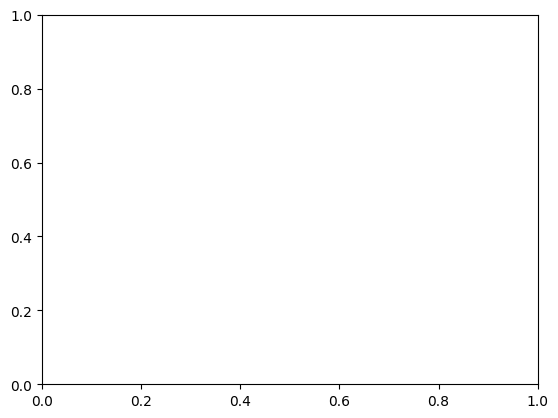

In [17]:
upperfence = 3 * IQR
df[df['나이'] < upperfence]

## 풀이

###힌트1

>위의 내용에서 이용거리별 이용시간이 나올듯 하지만 이용 거리와 관계 없이 이용시간이 나타나는 것을 알 수 있다. 예를 들어 1100미터를 이동하는데 12분이 걸린 반면 1420미터를 이동하는데 7분이 소요되었다. 거리는 늘었지만 시간이 준 경우이기 때문에 이를 이용하여 이용시간을 지정할 수는 없다. 

>결측치 치환은 누락되거나 비어 있는 데이터를 임의의 데이터로 변경하는 작업을 의미한다. 변경 시 기존 데이터 분석에 영향을 줄이려면 대표값을 입력해야 한다. 본 Quiz에서는 평균값 치환에 대해 알아 보려고 한다.

> 평균이란 그룹내의 대표값이 된다. 이렇게 그룹내의 평균을 알아보기 위해 그룹을 묶어 주어야 하며 같은 대여소에서 발생되는 이벤트는 비슷하게 이루어 질 것이기 때문에 위처럼 대여소 번호로 그룹을 묶어야 한다.


> 이번에는 간단히 replace 사용법에 대해 알아보려 한다. replace는 첫 번째 인자를 두 번째 인자로 치환해 주는 함수이다. dataframe에 replace를 적용하면 모든 row에 적용되어 문제가 발생된다. 

> 특정 위치에만 적용하기 위해서는 주석 내용처럼 json 형식으로 값을 지정하여 변경할 수 있다.

>위의 내용을 힌트로 보여 주고 위처럼 접근할 수 있도록 코딩을 유도한다.

###힌트2

> 적당한 시간이 흐르면 위의 코드를 설명해 준다.
1. 대여소 번호별로 출력되는지 확인한다.
2. 같은 대여소 번호에서 이용거리만 출력되는지 확인한다.

>위의 확인이 끝나면 646번 대여소번호의 평균을 구하고 이를 이용거리 결측치 부분에 대입한 후 결과를 확인한다.




###힌트3
>다음과 같은 순서로 코딩할 수 있도록 유도한다.
1. 결측열 찾기
2. 대여소 번호 얻기
3. 대여소번호와 column 명을 전달하면 변경

###힌트4

###힌트5